In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [2]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [3]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [4]:
data = pd.read_csv(path,names=headernames)
data.shape

(150, 5)

In [5]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
X=data.iloc[:,:-1].values
y=data.iloc[:,4].values

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [10]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [11]:
# Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(X_train,y_train)

GaussianNB()

In [13]:
y_predict = bayes.predict(X_train)

In [14]:
accuracy = accuracy_score(y_train,y_predict)
print('Accuracy: ',accuracy)

Accuracy:  0.9523809523809523


In [15]:
y_predict1 = bayes.predict(X_test)

In [16]:
accuracy1 = accuracy_score(y_test,y_predict1)
print('Test Accuracy: ',accuracy1)

Test Accuracy:  0.9555555555555556


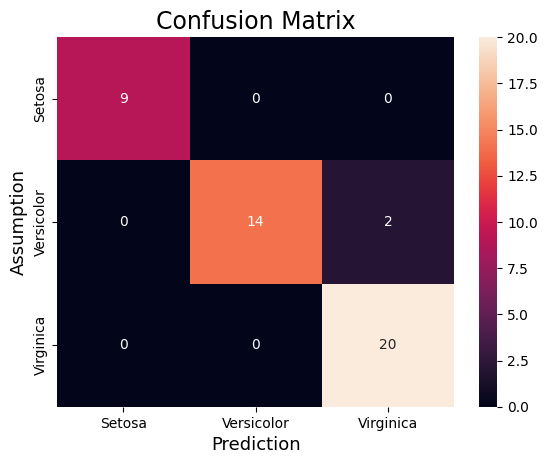

In [17]:
result = confusion_matrix(y_test,y_predict1)
sns.heatmap(result,
           annot= True,
           fmt='g',
           xticklabels=['Setosa','Versicolor', 'Virginica'],
           yticklabels=['Setosa','Versicolor', 'Virginica'])
plt.xlabel('Prediction',fontsize = 13)
plt.ylabel('Assumption',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [18]:
result1 = classification_report(y_test,y_predict1)
print('Classification Report: ')
print(result1)
result2 = accuracy_score(y_test,y_predict1)
print("Accuracy: ",accuracy1)

Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.88      0.93        16
 Iris-virginica       0.91      1.00      0.95        20

       accuracy                           0.96        45
      macro avg       0.97      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

Accuracy:  0.9555555555555556


**Support Vector Machine(SVM)**

In [19]:
from sklearn.svm import SVC
accuracy_list = []

for i in ['linear', 'poly', 'rbf', 'sigmoid']:
    clf = SVC(kernel=i)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_train)
    accuracy = accuracy_score(y_train,y_pred)
    accuracy_list.append(accuracy)

    print('Accuracy of '+ i,'is',float(accuracy))

Accuracy of linear is 0.9809523809523809
Accuracy of poly is 0.9619047619047619
Accuracy of rbf is 0.9809523809523809
Accuracy of sigmoid is 0.8476190476190476


In [20]:
accuracies = {
    'Linear': accuracy_list[0],
    'Polynomial': accuracy_list[1],
    'RBF': accuracy_list[2],
    'Sigmoid': accuracy_list[3]
}

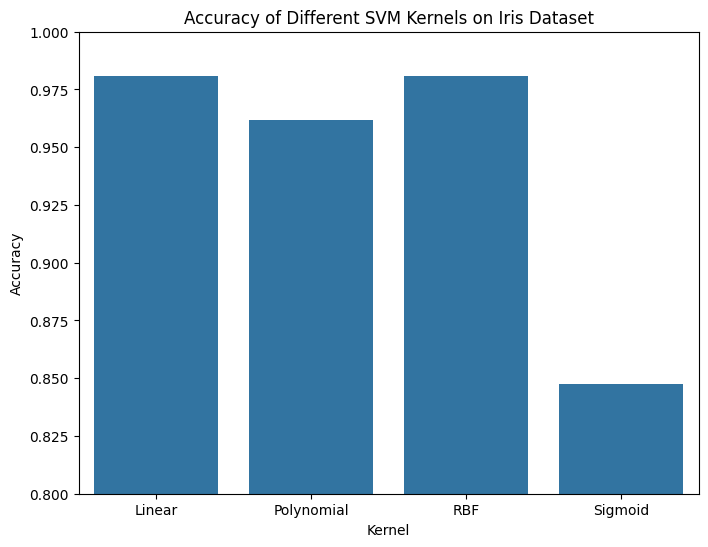

In [21]:
plt.figure(figsize=(8,6))
sns.barplot(x=list(accuracies.keys()),y=list(accuracies.values()))
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different SVM Kernels on Iris Dataset')
plt.ylim(0.8,1.0)
plt.show()

In [22]:
accuracy_list = []

for i in ['linear', 'poly', 'rbf', 'sigmoid']:
    clf = SVC(kernel=i)
    clf.fit(X_train,y_train)
    y_pred1 = clf.predict(X_test)
    accuracy1 = accuracy_score(y_test,y_pred1)
    accuracy_list.append(accuracy1)

    print('Accuracy of '+ i,'is',float(accuracy1))

Accuracy of linear is 0.9555555555555556
Accuracy of poly is 0.9555555555555556
Accuracy of rbf is 0.9777777777777777
Accuracy of sigmoid is 0.7555555555555555


In [23]:
accuracies = {
    'Linear': accuracy_list[0],
    'Polynomial': accuracy_list[1],
    'RBF': accuracy_list[2],
    'Sigmoid': accuracy_list[3]
}

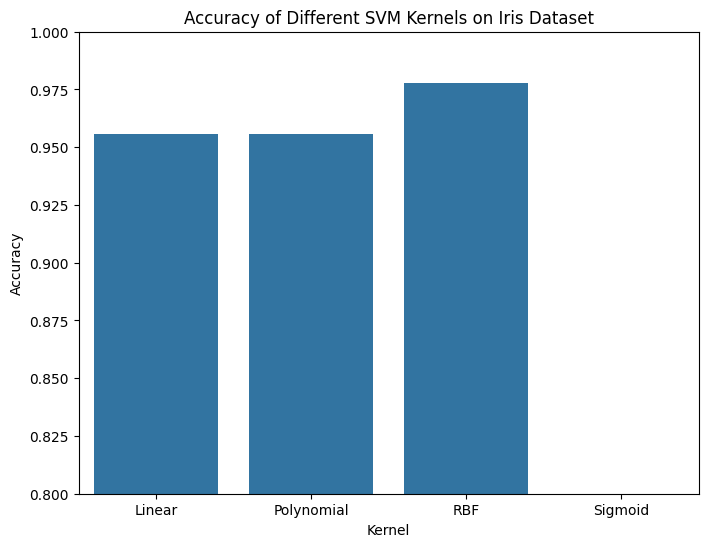

In [24]:
plt.figure(figsize=(8,6))
sns.barplot(x=list(accuracies.keys()),y=list(accuracies.values()))
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different SVM Kernels on Iris Dataset')
plt.ylim(0.8,1.0)
plt.show()

In SVM we have achieved highest accuracy with the linear and RBF kernels which is 97.77%. In the Sigmoid kernel we have achieved 
9.55% which the 2nd highest and for Polynomial kernel we have achieved 88.88%. There we can say that accuracies of Liner, RBF and Sigmoid kernels are really good on the test dataset. We can also conclude that there is no overfitting as there is not much difference between the training and testing
accuracies.

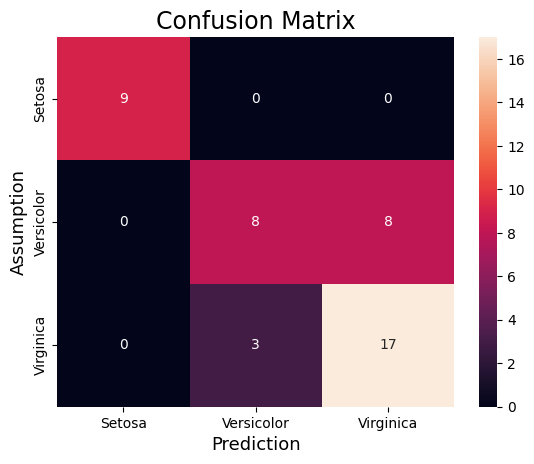

In [25]:
result1 = confusion_matrix(y_test,y_pred1)
sns.heatmap(result1,
           annot= True,
           fmt='g',
           xticklabels=['Setosa','Versicolor', 'Virginica'],
           yticklabels=['Setosa','Versicolor', 'Virginica'])
plt.xlabel('Prediction',fontsize = 13)
plt.ylabel('Assumption',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Out of 17 Setosa, 17 have been correctly classified as Satosa. Out of 12 Versicolor 11 have correctly classified as Versicolor and 1 is incorrectly classified as Virginica. Out of 16 Verginica, 15 are correctly classifed and 1 is incorrecly classified as Versicolor.

**K Nearest Neighbour (KNN)**

In [40]:
from sklearn.neighbors import KNeighborsClassifier
accuracy_list = []
for i in [8,9,11,12,13,14,15]:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_predict2 = knn.predict(X_train)
    accuracy3 = accuracy_score(y_train,y_predict2)
    accuracy_list.append(accuracy3)

    print('Accuracy of '+ str(i), 'is',float(accuracy3))

Accuracy of 8 is 0.9619047619047619
Accuracy of 9 is 0.9714285714285714
Accuracy of 11 is 0.9714285714285714
Accuracy of 12 is 0.9714285714285714
Accuracy of 13 is 0.9714285714285714
Accuracy of 14 is 0.9619047619047619
Accuracy of 15 is 0.9619047619047619


In [57]:
accuracy_list = []
for i in [8,9,10,11,12,13,14]:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_predict3 = knn.predict(X_test)
    accuracy4 = accuracy_score(y_test,y_predict3)
    accuracy_list.append(accuracy4)
    
    print('Accuracy of '+ str(i), 'is',float(accuracy4))

Accuracy of 8 is 0.9777777777777777
Accuracy of 9 is 0.9777777777777777
Accuracy of 10 is 0.9777777777777777
Accuracy of 11 is 0.9555555555555556
Accuracy of 12 is 0.9777777777777777
Accuracy of 13 is 0.9777777777777777
Accuracy of 14 is 0.9777777777777777


In [65]:
def hmap(n_neighbors):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    y_predict3 = knn.predict(X_test)
    accuracy5 = accuracy_score(y_test,y_predict3)
    result4 = confusion_matrix(y_test,y_predict3)
    sns.heatmap(result4,
               annot=True,
               fmt='g',
               xticklabels=['Setosa','Versicolor', 'Virginica'],
               yticklabels=['Setosa','Versicolor', 'Virginica'])
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Confusion Matrix KNN: ' + str(n_neighbors),fontsize=17)
    plt.show()
    print('Accuracy of '+ str(n_neighbors), 'is',float(accuracy5))

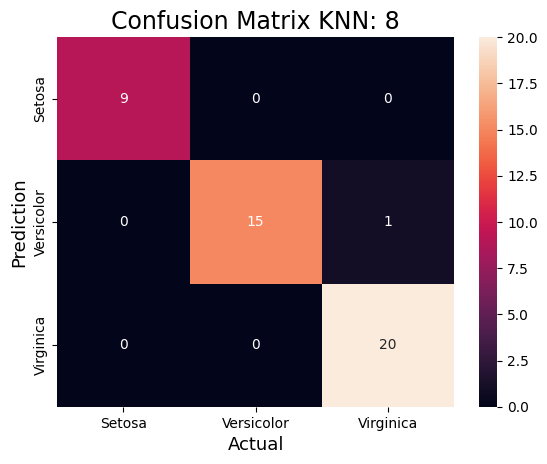

Accuracy of 8 is 0.9777777777777777


In [66]:
hmap(8)

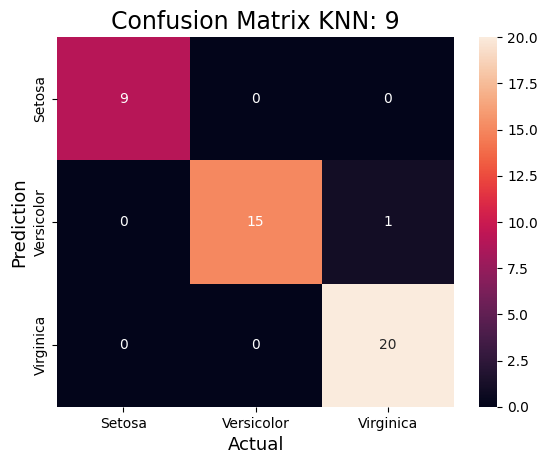

Accuracy of 9 is 0.9777777777777777


In [67]:
hmap(9)

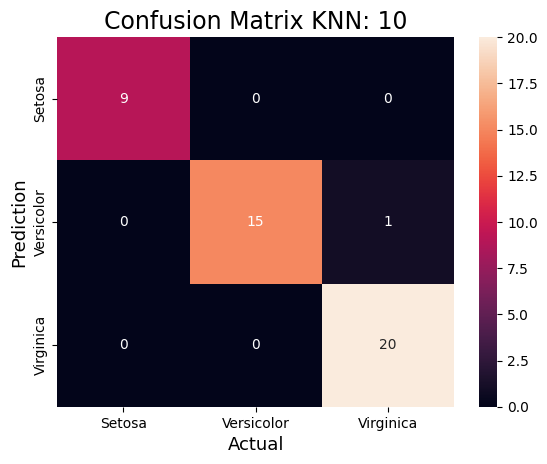

Accuracy of 10 is 0.9777777777777777


In [68]:
hmap(10)

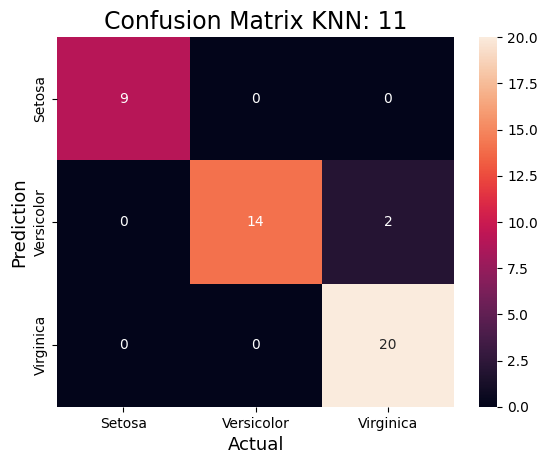

Accuracy of 11 is 0.9555555555555556


In [69]:
hmap(11)

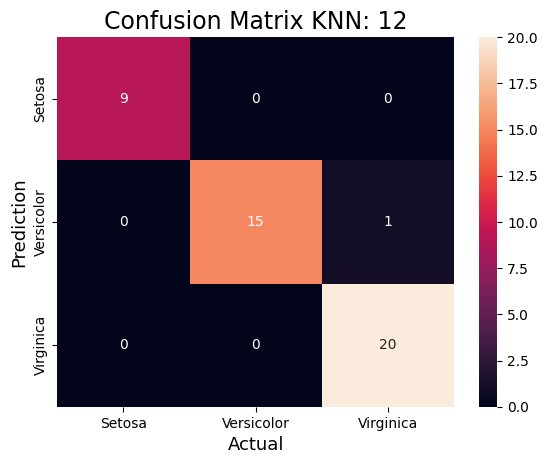

Accuracy of 12 is 0.9777777777777777


In [70]:
hmap(12)

Here, we have observed that the KNN algorithm is doing well for the values K = 8, 9,10,12,13 and 14 where it has achieved the highest accuracy of 97.77% for the test dataset. There are no such differences in accuracy between training and test datasets while exploring KNN over it. Therefore, there is no scenario of overfitting or underfitting.